# A tour of Machine Learning Classifiers Using scikit-learn

We will discuss following things here:-
- Introduction to robust and popular algorithms for classification, such as logistic regression, support vector machines, and decision trees
- Examples and explanations using the scikit-learn machine learning library, which provides a wide variety of machine learning algorithms via user-friendly python API
- Discussions about the strengths and weakness of classifiers with linear and non-linear decision boundaries

# Choosing a classification algorithm

No single classifier works best across all possible scenarios. (No Free Lunch Theorem)

It is always recommended to compare the performance of at least a handful of different learning algorithms to select the best model for the particular problem; these may differ in the number of features or samples, the amount of noise in a dataset, and whether the classes are linearly separable or not.

The five main steps that are involved in training a machine learning algorithm can be summarised as follows:
1. Selecting features and collecting training samples.
2. Choosing a performance metric.
3. Choosing a classifier and optimization algorithm.
4. Evaluating the performance of the model.
5. Tuning the algorithm.

In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:,[2,3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


# Splitting Data For Evaluation

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1, stratify = y)

In [6]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train', np.bincount(y_train))
print('Labels counts in y_test', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train [35 35 35]
Labels counts in y_test [15 15 15]


Stratified sampliling equally divide class labels in training set and testing set.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
from sklearn.linear_model import Perceptron

In [10]:
ppn = Perceptron(max_iter=40, eta0 = 0.1, random_state=1)
ppn.fit(X_train_std,y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
y_pred = ppn.predict(X_test_std)

In [12]:
print('Miscalssified samples: %d'%(y_test != y_pred).sum())

Miscalssified samples: 1


In [13]:
from sklearn.metrics import accuracy_score

In [14]:
print('Accuracy: {0:.2f}'.format(accuracy_score(y_test,y_pred)))

Accuracy: 0.98


In [15]:
#alternative
print('Accuracy: {0:.2f}'.format(ppn.score(X_test_std,y_test)))

Accuracy: 0.98


# Decision Plot Curves

In [16]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [17]:
def plot_decision_regions(X, y, classifiers, test_idx = None, resolution = 0.02):
    
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    
    Z = classifiers.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, cmap = cmap, alpha = 0.3)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y==cl, 0], y = X[y==cl, 1], alpha = 0.8, c = colors[idx], marker = markers[idx], label = cl, edgecolor='black')
        
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:,0], X_test[:,1], c = '', edgecolor='black', alpha = 1.0, linewidth = 1, marker = 'o', s = 100, label = 'test set')

In [18]:
X_combined_std = np.vstack([X_train_std,X_test_std])
y_combined = np.hstack([y_train,y_test])

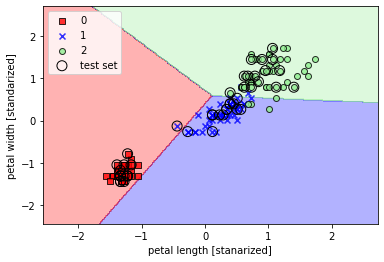

In [19]:
plot_decision_regions(X = X_combined_std, y = y_combined, classifiers= ppn, test_idx= range(105,150))
plt.xlabel('petal length [stanarized]')
plt.ylabel('petal width [standarized]')
plt.legend(loc = 'upper left')
plt.show()

Perceptron algorithm never converges on datasets that aren't perfectly linearly separable, which is why the use of the percpetron algorithm is typically not recommended in practice. It is the Biggest Dis-advantage of the Perceptron.

# Modelling Class probailites via Logistic Regression

Similar to Perceptron and Adaline, the logistic regression model is also a linear model for binary classification that can be extended to mutliclass classification, via the OvR technique (One Vs Rest)

We can consider Logistic Regression as a type of Adaptive Linear neural Network since it uses activation function, in this case activation function is sigmoid function.

## Sigmoid Function

In [20]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

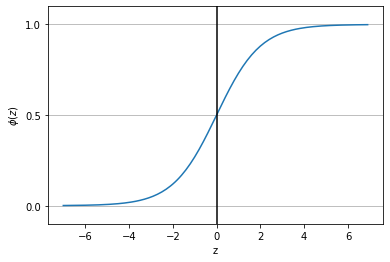

In [21]:
z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,c = 'k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0,0.5,1.0])
ax = plt.gca()
ax.yaxis.grid(True)

# Learning the weights of the Logistic Cost Function

## Hypothesis

$ \phi{(z)} = \frac {1} {1 + \exp ^{-z}} $

where,
$ z =  W^{T}X $

## Cost Function

$ J(w) = \sum \frac {1} {2} (\phi{(z)} - y) ^{2} $

$ J(w) = \sum _{i=1} ^{n} [ -y ^{(i)} \log {(\phi{(z ^{(i)})})} - (1 - y ^{(i)})\log {(1 - \phi{(z ^{(i)}})} ] $

$ if y = 1; J(\phi{(z), y; w)} = -\log{(\phi{(z)})} $
  
$ if y = 0; J(\phi{(z), y; w)} = -\log(1 - \phi{(z)}) $
    


In [22]:
def cost_1(z):
    return -np.log(sigmoid(z))

def cost_0(z):
    return -np.log(1 - sigmoid(z))

In [23]:
z = np.arange(-10,10,0.1)
phi_z = sigmoid(z)

In [24]:
c1 = [cost_1(x) for x in z] 
c2 = [cost_0(x) for x in z]

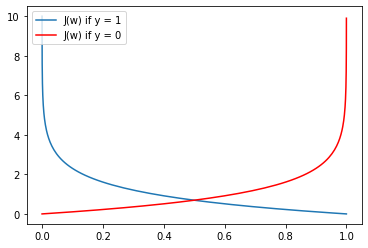

In [25]:
plt.plot(phi_z, c1, label = 'J(w) if y = 1')
plt.plot(phi_z, c2, label = 'J(w) if y = 0', color = 'red')
plt.legend(loc = "upper left")
plt.show()

# The Graident Descent Learning Algorithm For Logistic Regression

Gradient Descent is use to minimize the cost function

The weight update in logistic regression is equal to weight update in Adaline. i.e

$ w _j := w _j + n \sum _{i=1} ^{n} ( y ^{(i)} - \phi {(z ^{(i)})}) x _j ^{(i)} $

# Logistic Regression with Gradient Descent Optimization

The activation function that we will be using here is a sigmoid function, our threshold value will be 0.5

In [26]:
class LogisticRegressionGD(object):
    
    def __init__(self, epoch = 50, learning_rate = 0.01, random_state = 1):
        self.epoch = epoch
        self.learning_rate = learning_rate
        self.random_state = random_state
        
    def net_input(self, X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    
    def activation(self,z):
        return 1. / (1. + np.exp(-z))
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.costs_ = []
        
        for i in range(self.epoch):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.learning_rate * X.T.dot(errors)
            self.w_[0] += self.learning_rate * errors.sum()
            
            cost = (-y.dot(np.log(output))) - ((1 - y).dot(np.log(1-output)))
            self.costs_.append(cost)
            
        return self
            

In [27]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)] #because our model is binary model, so we are taking only two classes
y_train_01_subset = y_train[(y_train)==0 | (y_train == 1)]

In [28]:
print('The shape of our X and y is', X_train_01_subset.shape, y_train_01_subset.shape)

The shape of our X and y is (70, 2) (70,)


In [29]:
model = LogisticRegressionGD(learning_rate=0.05, epoch = 1000)

In [30]:
model.fit(X_train_01_subset, y_train_01_subset)

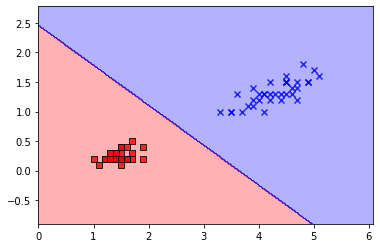

In [31]:
plot_decision_regions(X_train_01_subset,y_train_01_subset, model)

# Training a logistic regression model with scikit-learn

scikit-learn Logistic Regression model support multi-class classification through OvR technique.

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression(C=100.0, random_state=1) #X_train_std is standarize data, rememver standarization help in gradient descent optimization, it help in converging earlier
model.fit(X_train_std, y_train)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\scikit_learn-0.21.2-py3.6-win-amd64.egg\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\scikit_learn-0.21.2-py3.6-win-amd64.egg\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

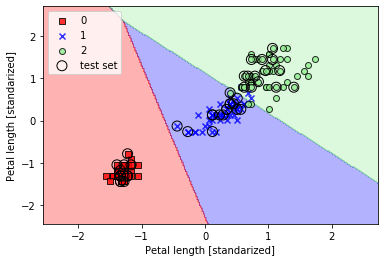

In [34]:
plot_decision_regions(X_combined_std, y_combined, model, range(105,150))
plt.xlabel('Petal length [standarized]')
plt.ylabel('Petal length [standarized]')
plt.legend(loc = 'upper left')
plt.show()

In [35]:
model.predict_proba(X_test_std[:3,:])


array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

In [36]:
model.predict_proba(X_test_std[:3,:]).sum(axis=1) #total probability sum will be 1

array([1., 1., 1.])

In [37]:
model.predict_proba(X_test_std[0,:].reshape(1,-1))

array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01]])

In [38]:
model.coef_

array([[-5.61268224, -4.30718677],
       [ 2.40969576, -2.07325711],
       [ 9.51524418,  5.39484899]])

# Tackling overfitting via regularization

**overfitting** is a common problem in machine learning, where a model performs well on training data but does not generalize well to unseen data (test data). If a model suffer from overfitting we can also say that model have high variance (there is trade off between bias and variance), which can be cause by having too many parameters (dimensions).

**underfitting** is a problem in which our model doesn not capture the pattern of data, we also can say that model have high bias.

one way of finding a good bias-variance tradeoff is to tune the complexity of the model via regularization.

**Regularization** is a very useful method to handle collinearity (hig correlation among feature), filter out noise from data, and eventually prevent overfitting.

The concept behind regularization is to introduce additional information (bias) to penalize extreme parameter values. There are two type of regularization, L1 and L2, the most common among them is L2 regularization.

$ \frac {\lambda} {2} ||w|| ^2 = \frac {\lambda} {2} \sum ^m _{j=1} w ^2 _j $, norm of a vector
 
Here,$ \lambda $ is the regularization parameter. By increasing the value of a $\lambda$, we increase the regularization strength. In scikit learn LogisticRegression Model, C is directly related to $\lambda$, which is it inverse

**Note** :- For regularization to work properly all features should be on a comparable scale so we must do feature scaling of our data

So , the cost function by applying L2 regularization will become

$ J(w) = \sum _{i=1} ^{n} [ -y ^{(i)} \log {(\phi{(z ^{(i)})})} - (1 - y ^{(i)})\log {(1 - \phi{(z ^{(i)}})} ] + \frac {\lambda} {2} ||w|| ^2 $

In [39]:
#Plotting the L2-regularization path for the two weight coefficients:
#for visualising how decreasing C will increase the strength of regularization
weights, params = [], []

for c in np.arange(-5,5):
    model = LogisticRegression(C=10. ** c, random_state=1)
    model.fit(X_train_std, y_train)
    weights.append(model.coef_[1]) # we are considering weight of our class 1 in iris datasets 
    params.append(10.**c)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\scikit_learn-0.21.2-py3.6-win-amd64.egg\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\scikit_learn-0.21.2-py3.6-win-amd64.egg\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\scikit_learn-0.21.2-py3.6-win-amd64.egg\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\scikit_learn-0.21.2-py3.6-win-amd64.egg\sklearn\linear_model\logistic.py

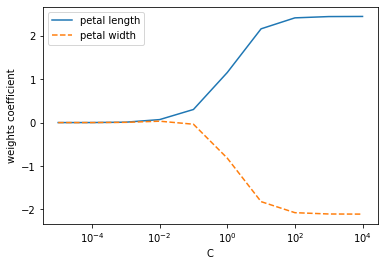

In [40]:
weights = np.array(weights)
plt.plot(params, weights[:,0], label = 'petal length')
plt.plot(params, weights[:,1], label = 'petal width', linestyle = '--')
plt.ylabel('weights coefficient')
plt.xlabel('C')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()

We can observe that as C decreases weight coeffcient shrink thus increasing the regularization.

# Maximum margin classification with support vector machines

Support Vector Machine (SVM) can be considered as an extension of perceptron.

SVM is all about maximizing the margin between classes or the hyperplane seperating the classes.

The margin is defined as the distance between the seperating hyperplane (decision-boundary) and the training samples that are closest to this hyperplane, which are so called support vectors.

The idea behind having Decision boundaries with large margins is that they tend to have a lower generalization error whereas models with small margins are more prone to overfitting.

## Maximum Margin Intuition

The objective function of the SVM becomes the maximization of the margin by maximizing $ \frac {2} {||w||} $ under the constraint that the samples are classified correctly.

## Dealing with a nonlinearity separable case using slack variables

$ \xi $ is called a slack variable, The motivation for introducing the slack variable was that the linear constraints need to be relaxed for nonlinearity separable data to allow the convergence of the optimization in the presence of misclassifications, under appropriate cost penilization.

In [41]:
from sklearn.svm import SVC

In [42]:
#initializing the model, here C is the inverse of regularization parameter
model = SVC(kernel='linear', C = 1.0, random_state=1)

#fitting the model
model.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

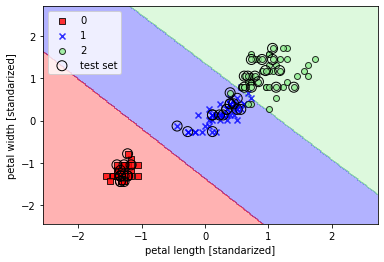

In [43]:
plot_decision_regions(X_combined_std, y_combined, model, range(105,150))
plt.xlabel('petal length [standarized]')
plt.ylabel('petal width [standarized]')
plt.legend(loc = 'upper left')
plt.show()

# Logistic Regression v/s Support Vector Machine

<br>
<em>

In practical classification tasks, linear logistic regression and linear SVM often yield very similar results.

**Logistic Regression tries to maximize the conditional likelihoods of the training data, which make it more prone to outliers than SVMs, which often care about the points that are closest to the decision boundary (support vectors).**

**On the other hands, logistic regression model is simple and can be easily implemented**

**Logistic Regression Model can be easily updated, which is attractive when working with streaming data.**

</em>

# Solving nonlinear problems using a kernel SVM

one of the benefit of SVM is that it can be easily **kernelized** to solve a nonlinear classification problems.

https://towardsdatascience.com/kernel-function-6f1d2be6091

**What is kernel  ?**

In machine learning, a kernel is usually used to refer to the kernel trick, a method of using a linear classifier to solve a non-linear problem. It entails transforming linearly inseparable data to linearly separable ones.

The kernel function is what is applied on each data instance to map the original non-linear observations into a higher-dimensional space in which they become separable.

In [44]:
#creating nonlinear classification data

np.random.seed(1)

X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] > 0,
                       X_xor[:, 1] > 0
                      )


y_xor = np.where(y_xor, 1 ,-1)


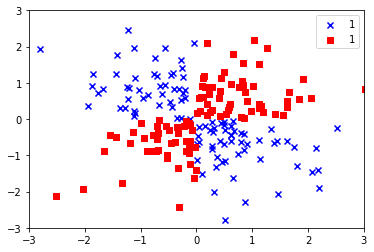

In [45]:
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor==1, 1], c = 'b', marker = 'x', label = '1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c = 'r', marker = 's', label = '1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc = 'best')
plt.show()

as can be observe in the above plot, we would not be able to separate samples from the positive and negative class very well using a linear hyperplane as a decision boundary via the linear logistic regression or linear SVM model

# Using the kernel trick to find separating hyperplanes in high-dimensional space

To solve a nonlinear problem using an SVM, we would transform the training data onto a higher-dimensional feature space via a mapping function $ \phi $ and train a linear SVM model to classify the data in this new feature space. Then we can use the same mapping funcion $ \phi $ to transform new, unseen data to classify it using the linear SVM model.

However one problem with this mapping approach is that the construction of the new features is computationally very expensive, especially if we are dealing with high-dimensional data. This is where Kernel-trick comes into the picture. One of the most widely used kernels is the **Radial Basis Function**

**Note:- Feature Scaling should be done before using Radial Basis Function or Gaussian Function**

$ \sigma ^2 $ High Variance, lower Bias

In [46]:
model = SVC(kernel='rbf', random_state=1, gamma=0.1, C = 10.0)
model.fit(X_xor, y_xor)


SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

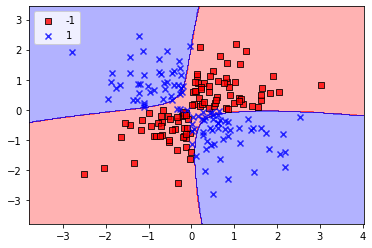

In [47]:
plot_decision_regions(X_xor, y_xor, model)
plt.legend(loc = 'upper left')
plt.show()

As we can see in above plot our kernel SVM separates the XOR data relatively well. Here gamma can be consider as a cut-off parameter for Gaussian Sphere, What that means is that if $ \gamma $ increases, will result in tighter or bumpier decision boundary

In [48]:
model = SVC(kernel='rbf', random_state=1, gamma=10, C = 10.0)
model.fit(X_xor, y_xor)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

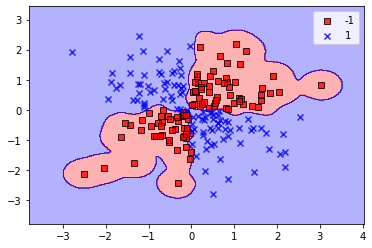

In [49]:
plot_decision_regions(X_xor, y_xor, model)
plt.legend(loc = 'best')
plt.show()

In the resulting plot, we can see that the decision boundary around the classes are much tighter using a relatively large value of $ \gamma $.

Although the model fits the training dataset very well, such a classifier will likely have a high generalization error on unseen data. This illustrates that the $ \gamma $ paramter also plays an important role in controlling overfitting

**Increaseing gamma increase overfitting**

# Decision Tree Learning

We can think of this model as breaking our data by making decision based on asking a series of questions.

Using the decision algorithm, we start at the tree root and split the data on the feature that results in the largest **Information Gain**. In an iterative process, we can repeat this splitting procedure at each child node until leaves are pure. In practice, this can result in a very deep tree with many nodes, which can easily lead to overfitting. Thus by default Decision Tree model have *Low bias and High Variance*. To resolve this we want to **prune** the tree by setting a limit for the maximal depth of the tree.

## Maximizing Information Gain

We can consider Information Gain (IG) as the average of all the Entropy (I), Entropy is the measure of purity of split or randomness.

$ IG(D _p, f)  = I(D _p) - \sum ^m _{(j=1)} \frac {N _j} {N _p} I (D _j) $

Here,

f -> feature to perform the split

$ D _p and D _j $ are the dataset of parent and jth child node

I -> Entropy measure or impurity measures

$ N _p $ -> Total number of samples at the parent node

$ N _j $ -> Total number of samples in jth child node

As we can see the Information gain is simply the difference between Impurity of parent node and the sum of the impurities of child node, the lower the impurity of the child (it is desirable to have lower impurity i.e lower entropy) nodes, the larger the information gain.

The three impurity measures or splitting criteria that are commonly used in binary decision trees are **Gini Impurity** $ (I _G) $, **entropy** $ (I _H) $, and the **classification error** $ (I _E) $

Entropy

$ I _H (t) = - \sum ^c _{(i=1)} p(i|t) log _2 p(i|t) $

where,

p(i|t) -> it is the proportion of the samples that belong to class c for a particular node t.

Thus, entropy is therefore 0 if all samples belong to the same class, truly pure. entorpy is maximal (1) if we have uniform class distribution.

**Note:- Both Gini impurity and entropy typically yields very similar results, though entropy is more computationally expenseive.**

Another impurity measure is the classification error:-

$ I _E = 1 - max\{p(i|t)\} $

This is useful criteria for **pruning** but not recommended for growing a decision tree, since it is less sensitive to changes in class probabilities of the nodes.

In [50]:
#visualizing different impurity measures for suppose class 1 in binary class classification p is the probaility of class 1, 1-p is the probaility of other class.

def gini(p):
    return 2 * ( p - p ** 2)

def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2(1-p)

def error(p):
    return 1 - np.max([p,1-p])


In [51]:
x =  np.arange(0.0, 1.0, 0.01) #probability have range 0 to 1 inclusive.

ent = [entropy(p) if p!=0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent] #scaled entropy
err = [error(i) for i in x]


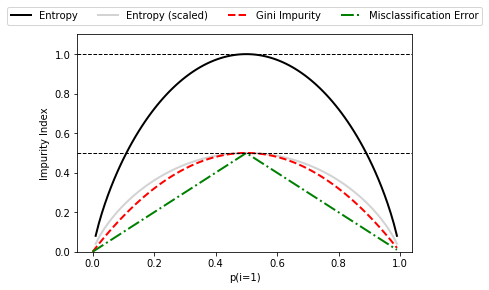

In [52]:
fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c in zip([ent,sc_ent,gini(x),err],['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],['-','-','--','-.'],['black','lightgray','red','green','cyan']):
    line = ax.plot(x,i,label = lab, linestyle = ls, lw = 2, color = c)
ax.legend(loc = 'upper center', ncol= 5, bbox_to_anchor = [0.5,1.15])
ax.axhline(y = 0.5, linewidth = 1, color = 'k', linestyle = '--')
ax.axhline(y = 1, linewidth = 1, color = 'k', linestyle = '--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

## Building a Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [54]:
model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=1
)

In [55]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [56]:
X_combined = np.vstack([X_train,X_test])
y_combined = np.hstack([y_train,y_test])

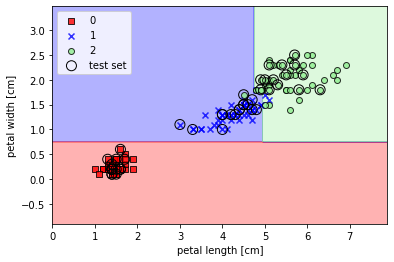

In [57]:
plot_decision_regions(X_combined,y_combined,model, range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')
plt.show()

## Visualizing our tree

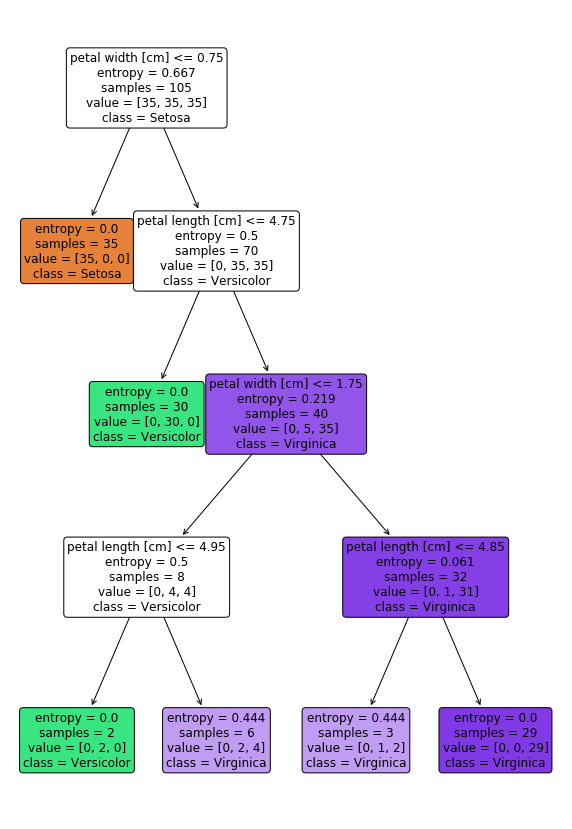

In [58]:
fig = plt.figure(figsize=  (10,15))
tree.plot_tree(
    model,
    rounded=True,
    filled=True,
    feature_names=['petal length [cm]', 'petal width [cm]'],
    class_names= ['Setosa', 'Versicolor', 'Virginica'],
    fontsize=12,
    impurity=True

)

plt.savefig('decision_tree_1.png')

In [59]:
#Let's change our depth to 3
model = DecisionTreeClassifier(
        criterion='gini',
        max_depth=3,
        random_state=1
        
)

In [60]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

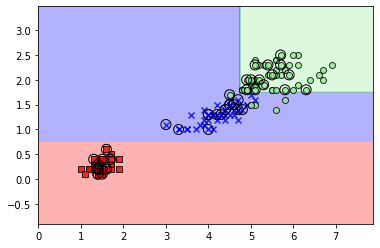

In [61]:
plot_decision_regions(X_combined,y_combined, model, range(105,150))

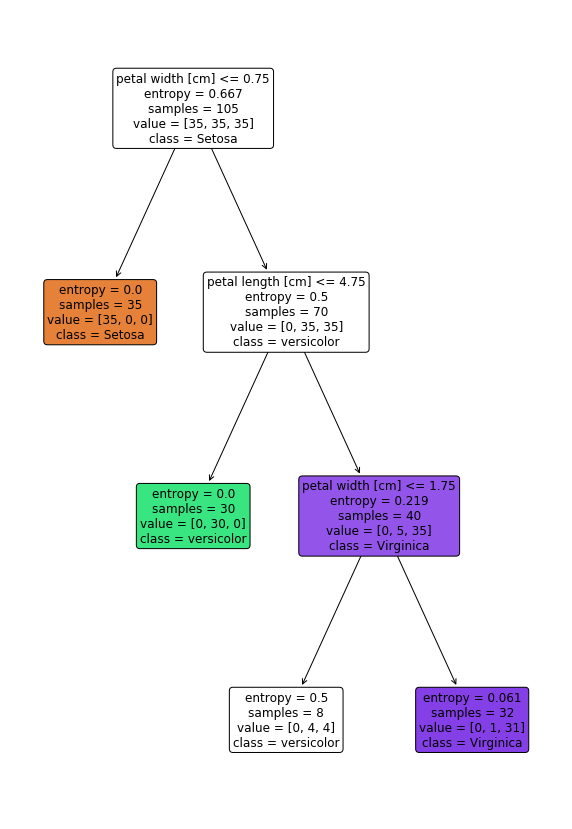

In [62]:
fig = plt.figure(figsize=(10,15))
tree.plot_tree(
    model,
    feature_names=['petal length [cm]', 'petal width [cm]'],
    class_names=['Setosa','versicolor','Virginica'],
    rounded = True,
    filled=True,
    fontsize=12
)
plt.show()

# Random Forests, an Ensemble Baggin approach

a popular machine learning algorithm that perform well most of the time ,due to its low variance and low bias properties.

The random Forest Algorithm can be summarised in four simple steps:-

1. Draw a random **bootstrap** sample of size n (with replacement).
2. Grow a decision tree from the bootstrap sample. At each node:<br>
    a. Randomly select d features without replacement.<br>
    b. Split the node using the feature that provides the best split according to the objective function, Information Gain.

3. Repeat the step 1 and 2 *k* times
4. Aggregate the prediction by each tree to assign the class label by **majority vote*

remember, sampling with replacement (probability are independant of samples), the samples are independant and have a covariance of zero.

**NOTE:- An advantage of random forest is that we don't have to worry so much about choosing good hyperparameter values.**

**We typically don't need to prune the random forest, also random forest is robust to noise in dataset**

**The only thing we need to take care about is k in step 3, or how many decision tree model we want to generate**
*Typically, the larger the number of trees (k), the better the performance of the random forest classifier at the expense of an increased computational cost.*

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
forest = RandomForestClassifier(
        criterion='gini',
        n_estimators=25,
        random_state=1,
        n_jobs=-1
)

In [65]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

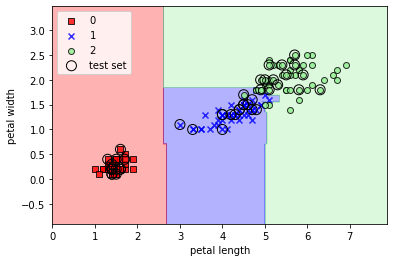

In [66]:
plot_decision_regions(X_combined, y_combined, forest, range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'best')
plt.show()

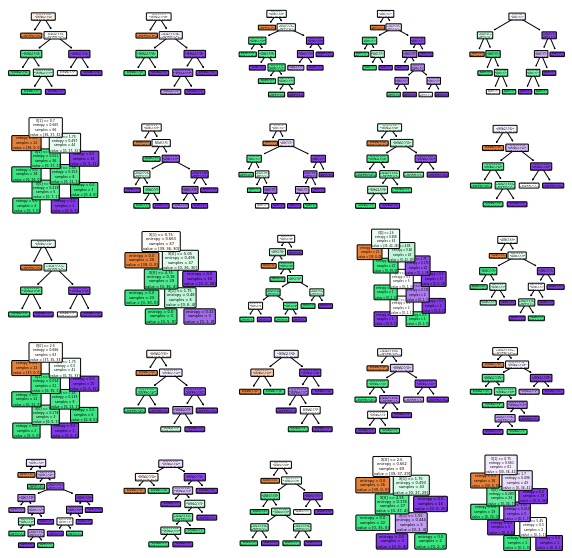

In [67]:
fig = plt.figure(figsize=(10,10))

for i in range(len(forest.estimators_)):
    plt.subplot(5,5,i+1)
    tree.plot_tree(
            forest.estimators_[i],
            rounded = True,
            filled = True
    )
plt.savefig('RandomForest.png')

# K-nearest neighbors 

KNN is a non-parametric models. It is described as instance-based learning. Model based on instance based learning are characterized by memorizing the dataset.

The steps followed are:- 

1. Choose the number of k and a distance metric.
2. Find the k-nearest neighbors of the sample that we want to classify.
3. Assign the class label by majority vote.
    

The main advantage of memory-based approach is that the model immediately adapts as we collect new training data. However the down side is that the computational complexity grown linearly with increase in the number of samples.

There are two distance metric that we use in Knn, Euclidean Distance and Manhattan distance.

*Note:- Data should be standarized before using KNN*<br>
*The right choice of k is (n_neighbors) crucial to find balance between overfitting and underfitting*<br>
*k value should be odd to avoid the balancing of classess*

**Imp:- KNN get affected by outliers and Imbalance Dataset**

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
model = KNeighborsClassifier(
        n_neighbors=5,
        p = 2,
        metric= 'minkowski'
)

In [71]:
model.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

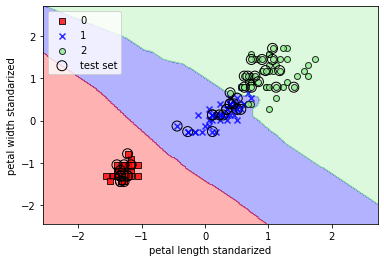

In [72]:
plot_decision_regions(X_combined_std, y_combined, model, range(105,150))
plt.xlabel('petal length standarized')
plt.ylabel('petal width standarized')
plt.legend(loc = 'upper left')
plt.show()

**The Curse of Dimensionality**
<br>
KNN is very susceptible to overfitting due to curse of dimensionality.

The COD describes the phenomenon where the feature space becomes increasing sparse (scattered) for an increasing number of dimensions of a fixed-size training dataset. 

Since, we can't perform regularization to solve overfitting problem in KNN, here we can use Feature Selection and dimensionality reduction technique such as PCA.